In [1]:
import dask
dask.__version__

'0.7.3'

### dask.array

In [2]:
import dask.array as da

x = da.random.normal(10, 0.1, size=(10000, 10000), chunks=(5000, 5000))
x.mean(axis=0)

dask.array<atop-a5..., shape=(10000,), dtype=float64, chunksize=(5000,)>

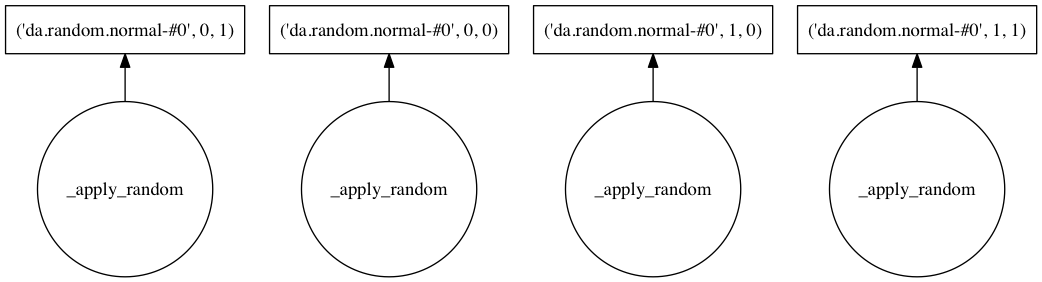

In [3]:
x.visualize()

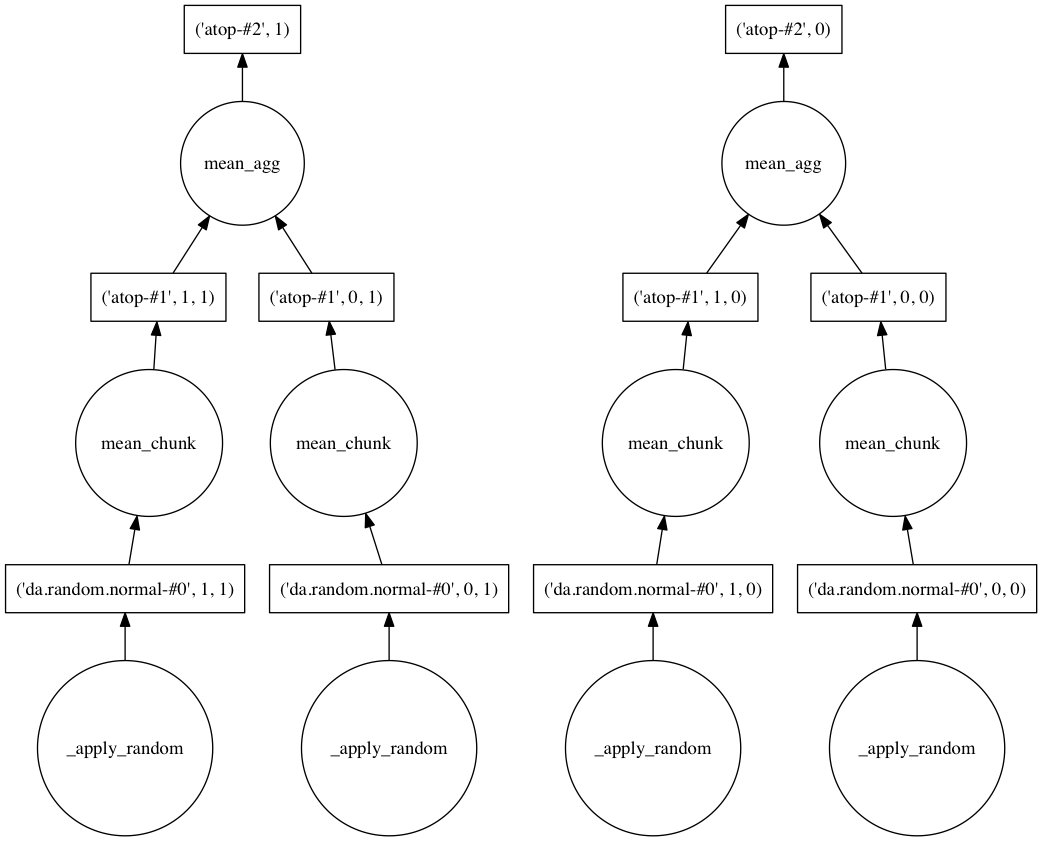

In [4]:
x.mean(axis=0).visualize()

In [5]:
x.mean(axis=0)[:3].compute()

array([  9.99956512,  10.00008023,   9.99977913])

### dask.dataframe

In [6]:
import pandas as pd
import dask.dataframe as dd

pd.options.display.max_columns = 8
pd.options.display.max_rows = 8

In [7]:
df = pd.read_csv('adult.data', header=None)
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
              'marital-status', 'occupation', 'relationship', 'race', 'sexz',
              'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
              'income']
df

,age,workclass,fnlwgt,education,...,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,...,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,...,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,...,0,40,United-States,<=50K
3,53,Private,234721,11th,...,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32557,40,Private,154374,HS-grad,...,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,...,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,...,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,...,0,40,United-States,>50K


In [8]:
ddf = dd.from_pandas(df, 3)
ddf

dd.DataFrame<from_pandas-654a0dfddf8d91abd713db9d9bf9e434, divisions=(0, 10854, 21708, 32560)>

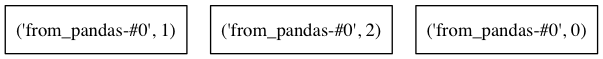

In [9]:
ddf.visualize()

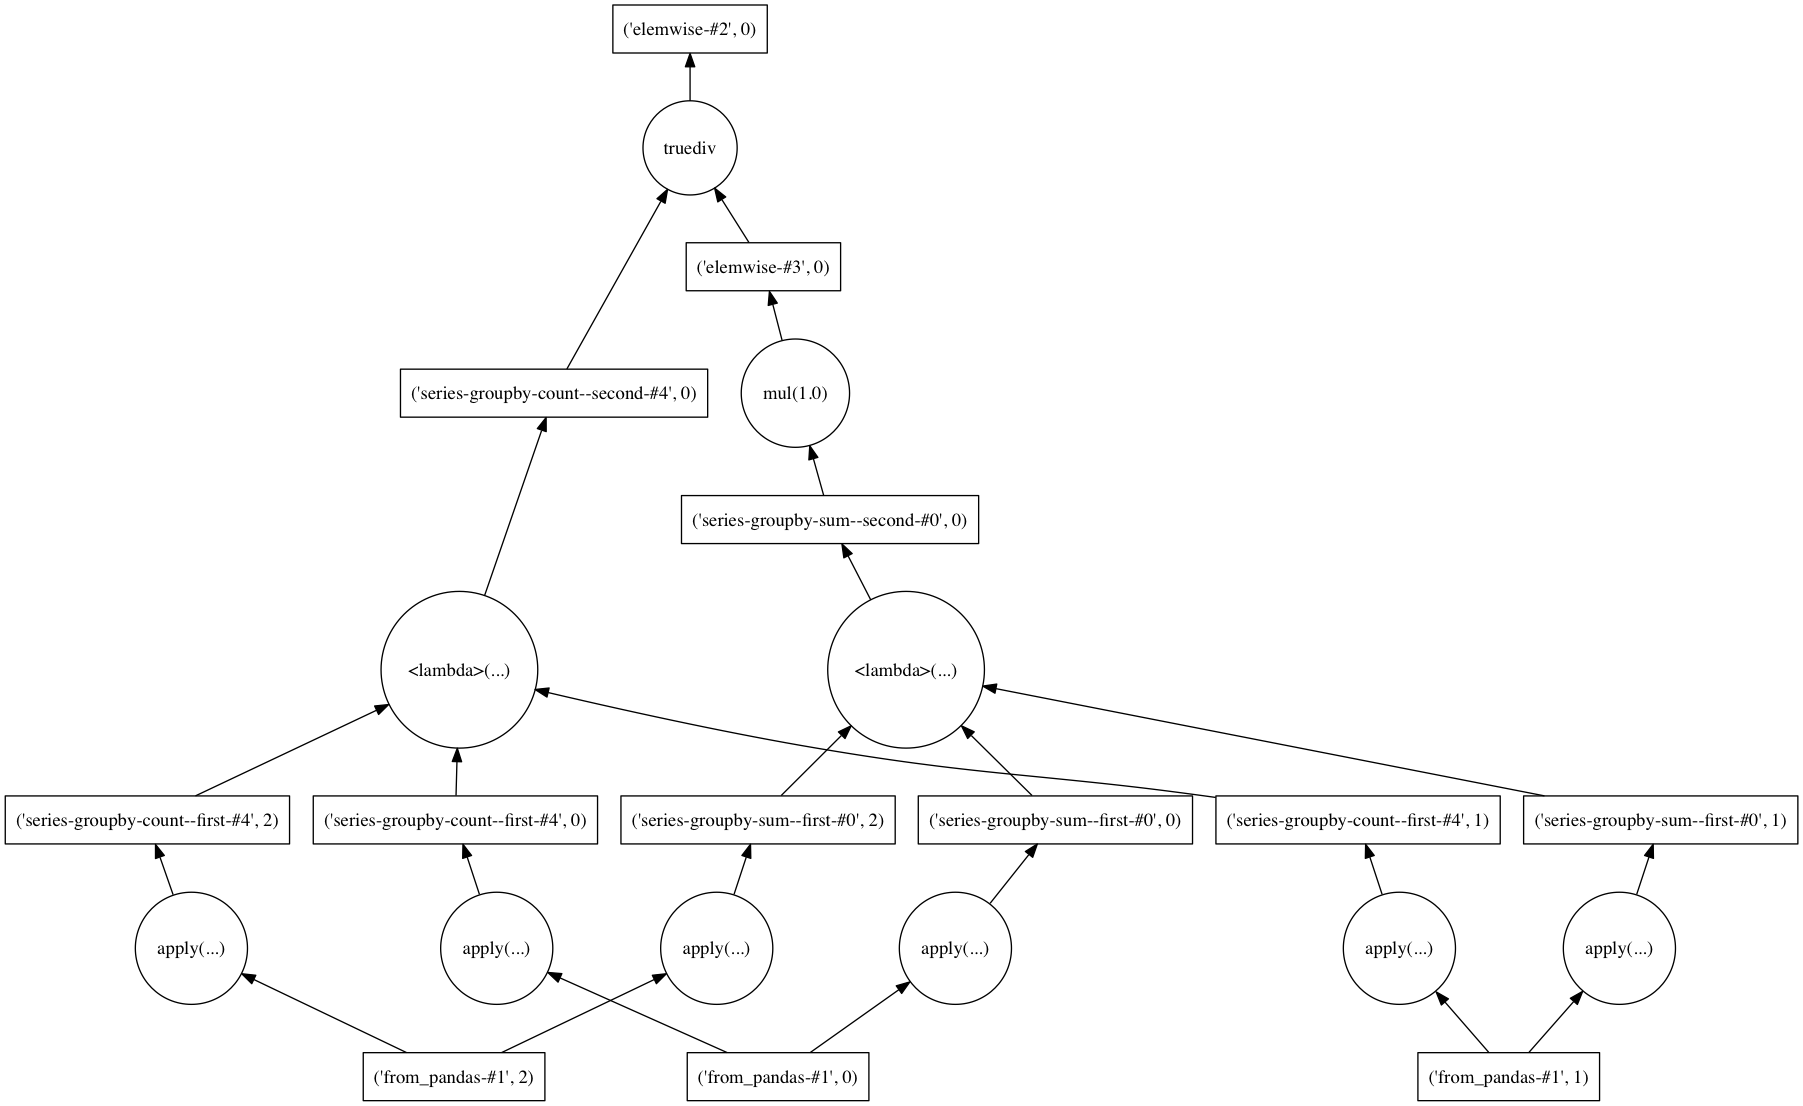

In [10]:
ddf.groupby('income')['hours-per-week'].mean().visualize()

In [11]:
ddf.groupby('income')['hours-per-week'].mean().compute()

income
 <=50K    38.840210
 >50K     45.473026
Name: hours-per-week, dtype: float64

### dask.bag

In [12]:
import dask.bag as db

bag = [row.tolist() for i, row in df.iterrows()]
bag[:2]

[[39,
  ' State-gov',
  77516,
  ' Bachelors',
  13,
  ' Never-married',
  ' Adm-clerical',
  ' Not-in-family',
  ' White',
  ' Male',
  2174,
  0,
  40,
  ' United-States',
  ' <=50K'],
 [50,
  ' Self-emp-not-inc',
  83311,
  ' Bachelors',
  13,
  ' Married-civ-spouse',
  ' Exec-managerial',
  ' Husband',
  ' White',
  ' Male',
  0,
  0,
  13,
  ' United-States',
  ' <=50K']]

In [13]:
pprint = pd.core.common.pprint_thing
pprint(bag[:2])

u'[[39,  State-gov, 77516,  Bachelors, 13,  Never-married,  Adm-clerical,  Not-in-family,  White,  Male, 2174, 0, 40,  United-States,  <=50K], [50,  Self-emp-not-inc, 83311,  Bachelors, 13,  Married-civ-spouse,  Exec-managerial,  Husband,  White,  Male, 0, 0, 13,  United-States,  <=50K]]'

In [14]:
len(bag)

32561

In [15]:
dbag = db.from_sequence(bag, npartitions=4)
dbag

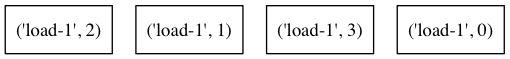

In [16]:
dbag.visualize()

In [17]:
dbag.filter(lambda d: d[13] == ' Mexico')

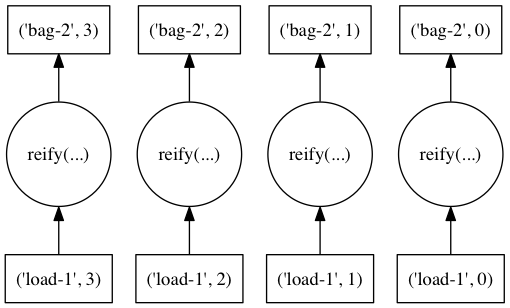

In [18]:
dbag.filter(lambda d: d[13] == ' Mexico').visualize()

In [19]:
result = dbag.filter(lambda d: d[13] == ' Mexico').compute()
pprint(result[:2])

u'[[34,  Private, 245487,  7th-8th, 4,  Married-civ-spouse,  Transport-moving,  Husband,  Amer-Indian-Eskimo,  Male, 0, 0, 45,  Mexico,  <=50K], [46,  Private, 216666,  5th-6th, 3,  Married-civ-spouse,  Machine-op-inspct,  Husband,  White,  Male, 0, 0, 40,  Mexico,  <=50K]]'

In [20]:
len(result)

643